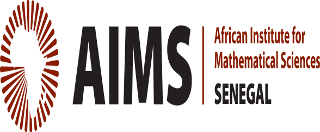

<h1>DEEP LEARNING PROJECT</h1>
<h2>BOSTON DATASET HOUSING PREDICTION</h2>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston_housing =load_boston()
df=pd.DataFrame(boston_housing.data,columns=boston_housing.feature_names)

In [3]:
df.shape

(506, 13)

In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
Y=pd.DataFrame(boston_housing.target)
Y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


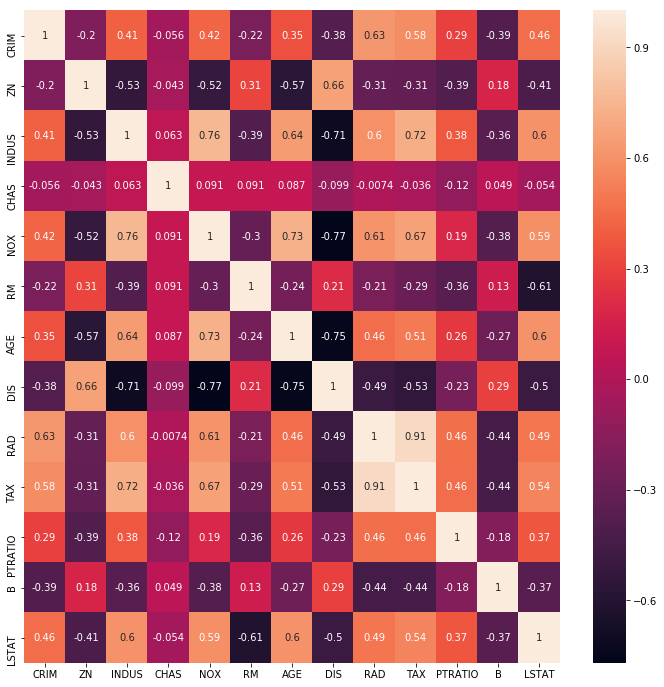

In [47]:
cm=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True)

The heatmap shows the correlation between the various features and their various associated values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B74AD05F8>,
      dtype=object)

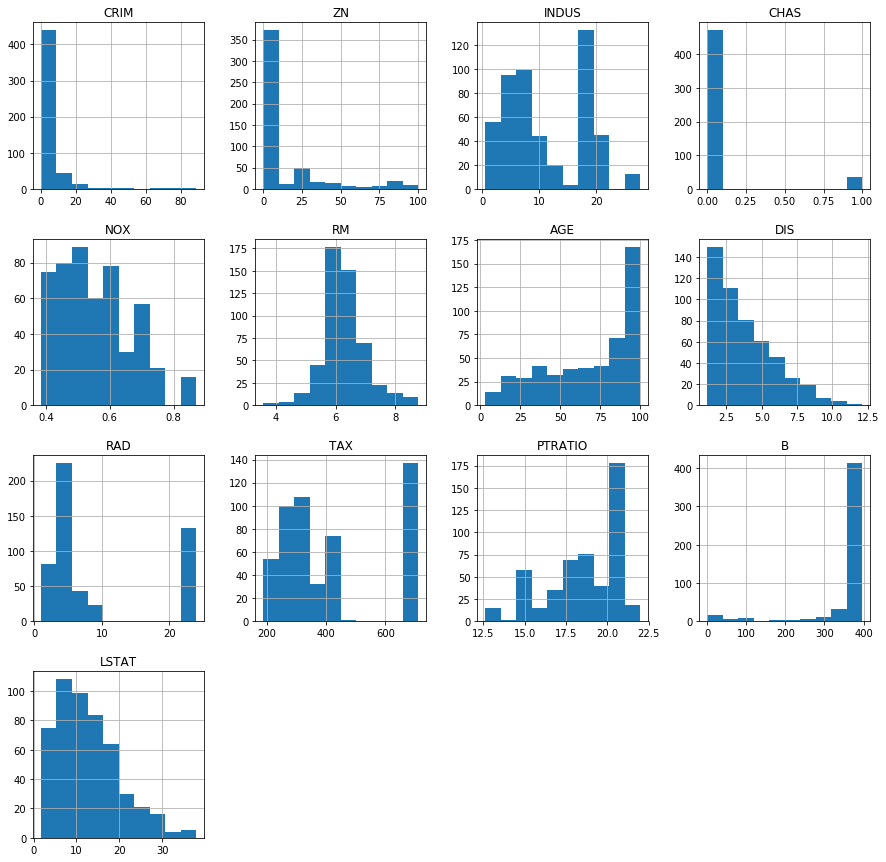

In [48]:
df.hist(figsize=(15,15))

From the graphs and the description of our data shown above,the mean and standard deviation for most of the features are high which would not help in making an accurate prediction.

In [49]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Normalisation

Due to the high mean and standard deviation obtained from the description of the dataset,we normalize our data.

In [50]:
# Normalizing the data
df=(df-np.mean(df))/np.std(df)

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Dist Plot of Target')

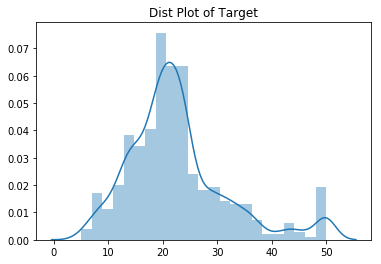

In [51]:
sns.distplot(Y)
plt.title('Dist Plot of Target')

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df,Y,test_size=0.2,random_state=0)

## Model 1

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [54]:
model=keras.Sequential([keras.layers.Dense(100,activation='tanh',input_shape=(X_train.shape[-1],)),
                        keras.layers.Dense(50,activation='tanh'),
                        keras.layers.Dropout(0.2),
                        keras.layers.Dense(20,activation='tanh'),
                        keras.layers.Dense(10,activation='tanh'),
                        keras.layers.Dense(1,activation='linear')])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 7,691
Trainable params: 7,691
Non-trainable params: 0
____________________________________________________

In [56]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [57]:
history=model.fit(X_train,Y_train,epochs=200,batch_size=30,workers=5,validation_split=0.1)

Epoch 1/200
13/13 [==============================] - 1s 49ms/step - loss: 585.5348 - mae: 22.4775 - val_loss: 521.4199 - val_mae: 21.8021
Epoch 2/200
13/13 [==============================] - 0s 9ms/step - loss: 547.9443 - mae: 21.9199 - val_loss: 499.2245 - val_mae: 21.3128
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 558.3110 - mae: 21.9936 - val_loss: 478.4227 - val_mae: 20.8206
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 556.2865 - mae: 21.7863 - val_loss: 458.5359 - val_mae: 20.2963
Epoch 5/200
13/13 [==============================] - 0s 8ms/step - loss: 501.9219 - mae: 20.8041 - val_loss: 436.5493 - val_mae: 19.6715
Epoch 6/200
13/13 [==============================] - 0s 8ms/step - loss: 480.8870 - mae: 20.0854 - val_loss: 418.2497 - val_mae: 19.1840
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 453.8996 - mae: 19.4732 - val_loss: 404.9929 - val_mae: 18.7999
Epoch 8/200
13/13 [=====================

Epoch 120/200
13/13 [==============================] - 0s 4ms/step - loss: 98.2015 - mae: 6.6506 - val_loss: 76.8739 - val_mae: 6.3021
Epoch 121/200
13/13 [==============================] - 0s 6ms/step - loss: 118.3173 - mae: 7.2083 - val_loss: 75.7007 - val_mae: 6.2163
Epoch 122/200
13/13 [==============================] - 0s 6ms/step - loss: 107.7514 - mae: 6.9173 - val_loss: 74.6298 - val_mae: 6.1194
Epoch 123/200
13/13 [==============================] - 0s 9ms/step - loss: 89.8368 - mae: 6.2750 - val_loss: 74.0558 - val_mae: 6.1064
Epoch 124/200
13/13 [==============================] - 0s 15ms/step - loss: 94.0691 - mae: 6.3461 - val_loss: 72.7559 - val_mae: 6.0021
Epoch 125/200
13/13 [==============================] - 0s 18ms/step - loss: 118.4531 - mae: 7.2091 - val_loss: 71.9480 - val_mae: 5.9279
Epoch 126/200
13/13 [==============================] - 0s 9ms/step - loss: 97.7909 - mae: 6.5454 - val_loss: 70.9202 - val_mae: 5.8786
Epoch 127/200
13/13 [=============================

In [58]:
y_pred_NN=model.predict(X_test)
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 4ms/step - loss: 61.3947 - mae: 4.6584


[61.3946647644043, 4.658396244049072]

In [59]:
mae_dt_NN = mean_absolute_error(Y_test, y_pred_NN)
mae_dt_NN

4.658396161771288

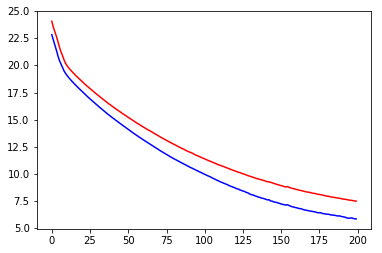

In [60]:

fig,ax=plt.subplots(1,1)
ax.plot(np.sqrt(history.history['loss']),'r',label='train')
ax.plot(np.sqrt(history.history['val_loss']),'b',label='val')

The loss seems to be decreasing. But we'd use another model to compare results.

<h2>LINEAR REGRESSION</h2>

In [61]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)
LR.score(X_test,Y_test)

0.5892223849182507

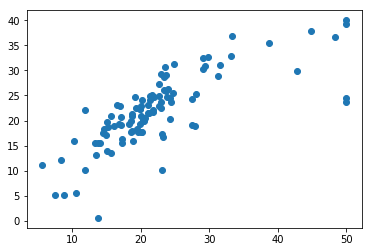

In [62]:
LR.score(X_train,Y_train)
plt.scatter(Y_test,LR.predict(X_test))


In [63]:
y_pred_LR=LR.predict(X_test)
mae_LR = mean_absolute_error(Y_test, y_pred_LR)
mae_LR

3.842909220444498

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=7,criterion='mae')
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)
y_pred_RF=rf.predict(X_test)


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
from sklearn.metrics import mean_absolute_error
mae_RF = mean_absolute_error(Y_test, y_pred_RF)
mae_RF


2.8232492997198877

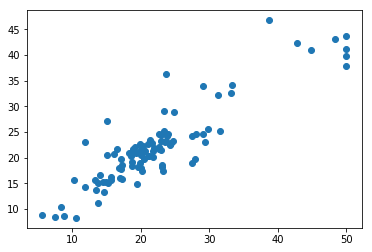

In [67]:
plt.scatter(Y_test,rf.predict(X_test))

<h2>CONCLUSION</h2>

In [92]:
Results=[mae_RF,mae_LR,mae_dt_NN]
columns=['RandomForest','LinearRegression','NeuralNetwork']
col=['Mean_Absolute_Error']
pd.DataFrame(Results,columns,columns=col)


,Mean_Absolute_Error
RandomForest,2.823249
LinearRegression,3.842909
NeuralNetwork,4.658396


We see from the above that the Random Forest Model gave a better mae and thus is the better model for predicting housing costs